# Introducción 

La base de datos que se utilizará en este reto es la de Telecom X, que contiene información sobre clientes, suscripciones y servicios de telecomunicaciones. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones y tendencias en el comportamiento de los clientes, así como para detectar posibles problemas o áreas de mejora en los servicios ofrecidos. 

Para ello, se utilizarán técnicas de limpieza y transformación de datos, así como herramientas de visualización y análisis estadístico. El análisis se centrará en aspectos como la distribución de los clientes por tipo de suscripción, el uso de servicios, la satisfacción del cliente y la retención de clientes.

El propósito general de este reto es encontrar patrones de personas que han abandono la empresa y que han permanecido en la empresa, para así poder identificar las características de los clientes que abandonan la empresa y las que permanecen.

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Lectura de datos

In [2]:
df = pd.read_csv('Base_datos_tratada.csv')

In [3]:
df.drop(columns= 'customerID', inplace=True)

In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

# Analisis Dirigido y de Correlación de las variables

## Distribución de las variables numéricas

In [5]:
def ancho_bin(df,columna):
    q75,q25 = np.percentile(df[columna],[75,25])
    iqr = q75-q25
    ancho = 2*iqr*np.power(len(df[columna]),-1/3)
    return ancho

In [6]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

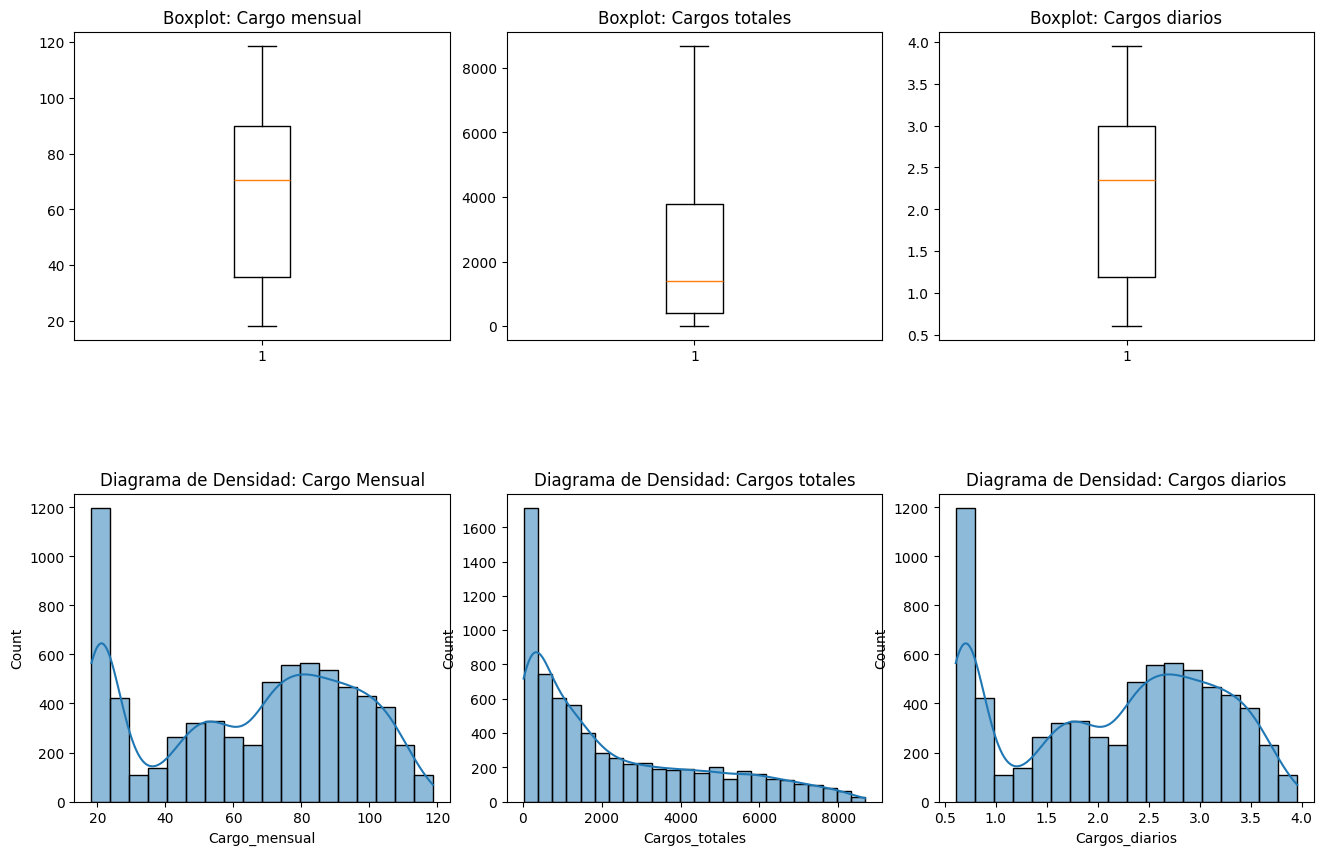

In [7]:
fig, ax = plt.subplots(2,3, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)
ax[0,0].boxplot(x = df['Cargo_mensual'])
ax[0,0].set_title('Boxplot: Cargo mensual')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Cargos totales')

ax[0,2].boxplot(x = df['Cargos_diarios'])
ax[0,2].set_title('Boxplot: Cargos diarios')



sns.histplot(data=df, x='Cargo_mensual', kde=True, binwidth=ancho_bin(df, 'Cargo_mensual'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Cargo Mensual')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Cargos totales')

sns.histplot(data= df, x = 'Cargos_diarios',kde= True, binwidth= ancho_bin(df,'Cargos_diarios'), ax = ax[1,2])
ax[1,2].set_title('Diagrama de Densidad: Cargos diarios')


plt.show()

In [8]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

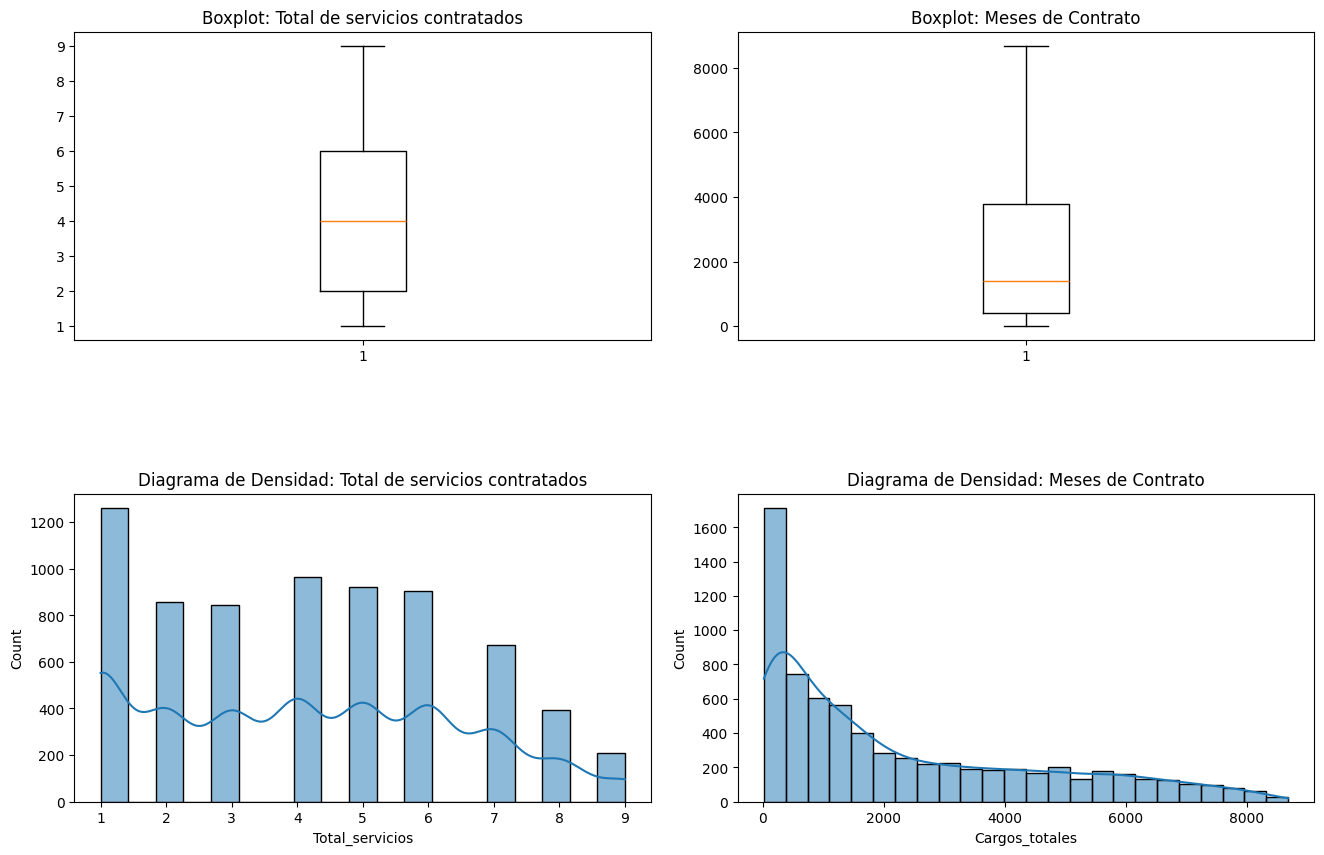

In [9]:
fig, ax = plt.subplots(2,2, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)


ax[0,0].boxplot(x = df['Total_servicios'])
ax[0,0].set_title('Boxplot: Total de servicios contratados')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Meses de Contrato')


sns.histplot(data=df, x='Total_servicios', kde=True, binwidth=ancho_bin(df, 'Total_servicios'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Total de servicios contratados')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Meses de Contrato')
plt.show()

In [10]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

## Analisis de correlación

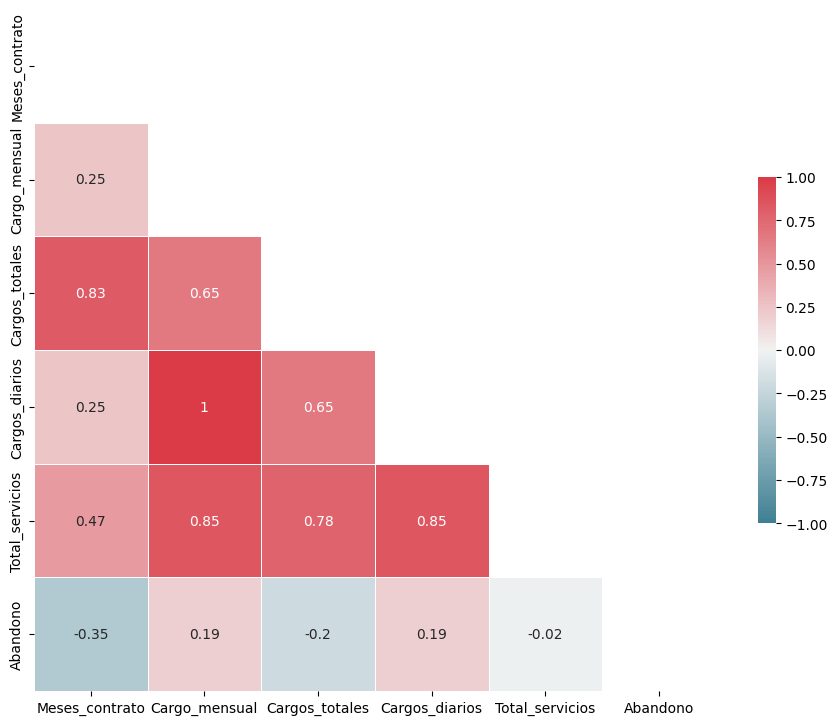

In [11]:
df_num = df[['Meses_contrato','Cargo_mensual','Cargos_totales','Cargos_diarios','Total_servicios', 'Abandono']]

# Calculate the correlation matrix
corr = df_num.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})




# Mostrar el mapa de calor (heatmap)
plt.show()

In [12]:
df_contrato_abandono = df[['Meses_contrato', 'Abandono']]

px.box(data_frame= df_contrato_abandono, x = 'Meses_contrato', color= 'Abandono')

In [13]:
df_cargo_mensual_abandono = df[['Cargo_mensual', 'Abandono']]

px.box(data_frame= df_cargo_mensual_abandono, x = 'Cargo_mensual', color= 'Abandono')

In [14]:
df_cargos_diarios_abandono = df[['Cargos_diarios', 'Abandono']]

px.box(data_frame= df_cargos_diarios_abandono, x = 'Cargos_diarios', color= 'Abandono')

In [15]:
df_cargos_totales_abandono = df[['Cargos_totales', 'Abandono']]

px.box(data_frame= df_cargos_totales_abandono, x = 'Cargos_totales', color= 'Abandono')

In [16]:
df_servicios_abandono = df[['Total_servicios', 'Abandono']]

px.box(data_frame= df_servicios_abandono, x = 'Total_servicios', color= 'Abandono')

Las variables númericas mostrarón tener una relación baja con la variable objetivo "Abandono", en particula la variable ``Total_servicios`` de igual forma esta variable mostro tener una alta relación con el resto de variables numéricas, por lo que se decidió eliminarla del análisis. Por otro lado las variables ``Cargo_mensual`` y ``Cargos_diarios`` mostarón tener una relación perfecta entre ellas, esto se debe a que la variable ``Cargos_diarios`` es el resultado de dividir la variable ``Cargo_mensual`` entre 30, por lo que se decidió eliminar la variable ``Cargos_diarios`` del análisis.

In [17]:
df.drop(columns= ['Cargos_diarios', 'Total_servicios'], inplace= True)
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales'],
      dtype='object')

## Distribución de las variable respuesta 

In [18]:
df.value_counts('Abandono', normalize=True).round(2)*100

Abandono
0    73.0
1    27.0
Name: proportion, dtype: float64

C:\Users\erik-\AppData\Local\Temp\ipykernel_15348\1057276694.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



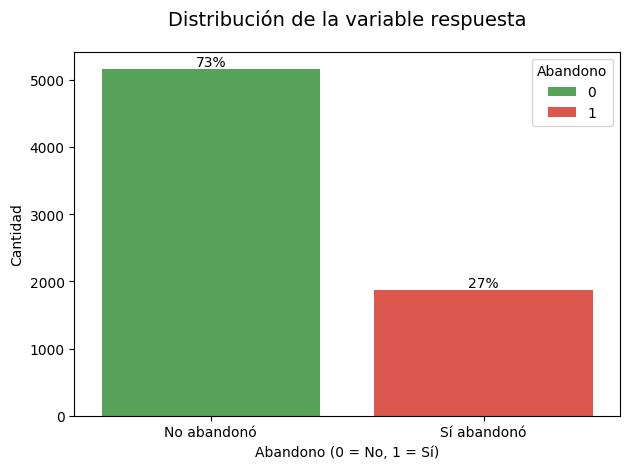

In [19]:
colores = {0: "#4CAF50", 1: "#F44336"}  # Verde y rojo

g = sns.countplot(
    data=df,
    x='Abandono',
    hue='Abandono',
    palette=colores
)

# Título y ejes
g.set_title('Distribución de la variable respuesta', y=1.05, fontsize=14)
g.set(xlabel='Abandono (0 = No, 1 = Sí)', ylabel='Cantidad')


total = len(df)
# Añadir etiquetas de datos sobre las barras
for p in g.patches:
    height = p.get_height()
    if height > 0:
        porcentaje = height / total * 100
        g.annotate(
            f'{int(round(porcentaje))}%',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Mejorar la leyenda
g.legend_.set_title("Abandono")
g.set_xticklabels(['No abandonó', 'Sí abandonó'])

plt.tight_layout()
plt.show()

Podemos identificar que la variable respuesta ``Abandono`` tiene una distribución muy desbalanceada, ya que el 73% de los clientes no han abandonado la empresa, mientras que el 27% si lo ha hecho. Esto puede ser un problema para los modelos de clasificación, ya que pueden tener una tendencia a predecir más la clase mayoritaria. Por lo tanto se aplicará una técnica de balanceo de clases para mejorar el rendimiento del modelo. 

Particularmente, se utilizará la técnica de sobremuestreo, especificamente la técnica de SMOTE (Synthetic Minority Over-sampling Technique).

# Preparación de los datos 

In [20]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales'],
      dtype='object')

## Normalización de las variables numéricas

In [21]:
X = df.drop(columns= 'Abandono')
y = df['Abandono']

In [22]:
normalizador = MinMaxScaler()
columnas_a_normalizar = ['Cargo_mensual', 'Cargos_totales']
X[columnas_a_normalizar] = normalizador.fit_transform(X[columnas_a_normalizar])


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        7032 non-null   object 
 1   Es_mayor_de_edad              7032 non-null   int64  
 2   Pareja                        7032 non-null   int64  
 3   Dependientes                  7032 non-null   int64  
 4   Meses_contrato                7032 non-null   int64  
 5   Servicio_telefonico           7032 non-null   int64  
 6   Lineas_telefonicas_multiples  7032 non-null   int64  
 7   Tipo_servicio_internet        7032 non-null   object 
 8   Seguridad_en_linea            7032 non-null   int64  
 9   Respaldo_en_linea             7032 non-null   int64  
 10  Proteccion_dispositivo        7032 non-null   int64  
 11  Soporte_tecnico               7032 non-null   int64  
 12  TV_en_streaming               7032 non-null   int64  
 13  Pel

## Variables categóricas

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
columnas_cat = list(X.select_dtypes(include='object').columns)

one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat),
                                  remainder= 'passthrough', sparse_threshold=0)


X_codificada = one_hot.fit_transform(X)
X_df = pd.DataFrame(X_codificada,columns=one_hot.get_feature_names_out())

In [26]:
X_df

,onehotencoder__Genero_Male,onehotencoder__Tipo_servicio_internet_DSL,onehotencoder__Tipo_servicio_internet_Fibra Optica,onehotencoder__Tipo_servicio_internet_Sin servicio,onehotencoder__Tipo_contrato_Dos años,onehotencoder__Tipo_contrato_Mes a mes,onehotencoder__Tipo_contrato_Un año,onehotencoder__Metodo_pago_Cheque electrónico,onehotencoder__Metodo_pago_Cheque por enviado por correo,onehotencoder__Metodo_pago_Tarjeta de crédito (automática),...,remainder__Lineas_telefonicas_multiples,remainder__Seguridad_en_linea,remainder__Respaldo_en_linea,remainder__Proteccion_dispositivo,remainder__Soporte_tecnico,remainder__TV_en_streaming,remainder__Peliculas_en_streaming,remainder__Factura_en_linea,remainder__Cargo_mensual,remainder__Cargos_totales
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556
7028,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043
7029,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533
7030,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831


## Selección de variables

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_resultados = calcular_vif(X_df)
display(vif_resultados[vif_resultados['VIF'] > 5]) 

c:\Users\erik-\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,Variable,VIF
1,onehotencoder__Tipo_servicio_internet_DSL,inf
2,onehotencoder__Tipo_servicio_internet_Fibra Op...,inf
6,onehotencoder__Tipo_contrato_Un año,inf
3,onehotencoder__Tipo_servicio_internet_Sin serv...,inf
4,onehotencoder__Tipo_contrato_Dos años,inf
5,onehotencoder__Tipo_contrato_Mes a mes,inf
8,onehotencoder__Metodo_pago_Cheque por enviado ...,inf
7,onehotencoder__Metodo_pago_Cheque electrónico,inf
9,onehotencoder__Metodo_pago_Tarjeta de crédito ...,inf
10,onehotencoder__Metodo_pago_Transferencia banca...,inf


In [28]:
X_df.columns

Index(['onehotencoder__Genero_Male',
       'onehotencoder__Tipo_servicio_internet_DSL',
       'onehotencoder__Tipo_servicio_internet_Fibra Optica',
       'onehotencoder__Tipo_servicio_internet_Sin servicio',
       'onehotencoder__Tipo_contrato_Dos años',
       'onehotencoder__Tipo_contrato_Mes a mes',
       'onehotencoder__Tipo_contrato_Un año',
       'onehotencoder__Metodo_pago_Cheque electrónico',
       'onehotencoder__Metodo_pago_Cheque por enviado por correo',
       'onehotencoder__Metodo_pago_Tarjeta de crédito (automática)',
       'onehotencoder__Metodo_pago_Transferencia bancaria (automática)',
       'remainder__Es_mayor_de_edad', 'remainder__Pareja',
       'remainder__Dependientes', 'remainder__Meses_contrato',
       'remainder__Servicio_telefonico',
       'remainder__Lineas_telefonicas_multiples',
       'remainder__Seguridad_en_linea', 'remainder__Respaldo_en_linea',
       'remainder__Proteccion_dispositivo', 'remainder__Soporte_tecnico',
       'remainder__TV_

In [29]:
X_df.drop(columns = ['onehotencoder__Tipo_servicio_internet_Sin servicio', 'remainder__Cargo_mensual', 'onehotencoder__Tipo_contrato_Mes a mes', 'onehotencoder__Metodo_pago_Cheque por enviado por correo', 'remainder__Cargos_totales'], inplace= True)

In [30]:
vif_resultados = calcular_vif(X_df)
display(vif_resultados[vif_resultados['VIF'] > 5]) 

,Variable,VIF
11,remainder__Meses_contrato,7.650966
2,onehotencoder__Tipo_servicio_internet_Fibra Op...,6.605005
12,remainder__Servicio_telefonico,5.886907


# Modelado predictivo

### Separación de variables explicativas y variable respuesta

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [32]:
# 70% entrenamiento, 15% test y 15% validación
X_train, X_temp, y_train, y_temp = train_test_split(X_df, y, test_size=0.30, stratify=y, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=5)

## Normalizacion de variable respuesta

In [33]:
oversampling = SMOTE(random_state= 5)
X_train_balanceada, y_train_balanceada = oversampling.fit_resample(X_train,y_train)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [35]:
def evaluacion_modelos(y_real, y_pred):
    print(f'Exactitud: {round(accuracy_score(y_real, y_pred), 3)}')
    print(f'Precisión: {round(precision_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'Recall: {round(recall_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'F1 Score: {round(f1_score(y_real, y_pred, zero_division=0), 3)}')
    matriz_confusion_modelo = confusion_matrix(y_real, y_pred)
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels=['No Abandono', 'Abandono'])
    visualizacion_matriz_confusion.plot();


Exactitud: 0.5
Precisión: 0.5
Recall: 0.2
F1 Score: 0.285


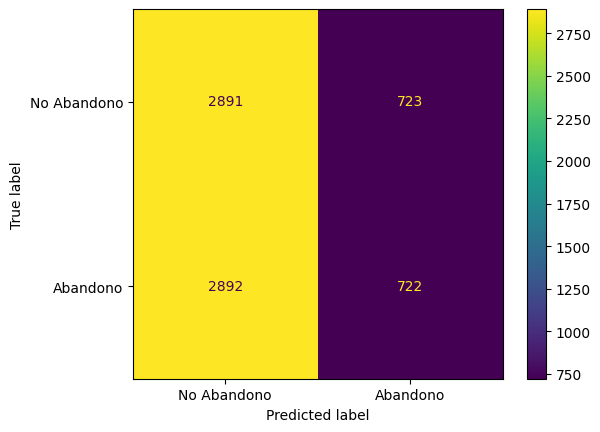

In [36]:
modelo_dummy = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
y_predict_cv_dummy = cross_val_predict(modelo_dummy, X_train_balanceada, y_train_balanceada, cv = skf)
evaluacion_modelos(y_train_balanceada,y_predict_cv_dummy)

Exactitud: 0.8
Precisión: 0.793
Recall: 0.811
F1 Score: 0.802


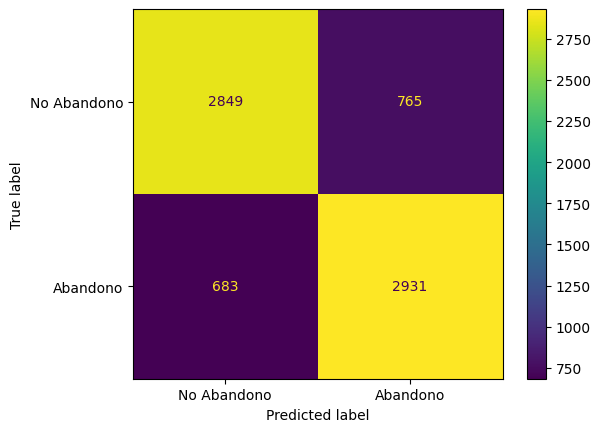

In [37]:
modelo_arbol = DecisionTreeClassifier(random_state= 5)
y_pred_cv_arbol = cross_val_predict(modelo_arbol,X_train_balanceada,y_train_balanceada, cv = skf)
resultados_arbol = evaluacion_modelos(y_train_balanceada,y_pred_cv_arbol)


Exactitud: 0.856
Precisión: 0.863
Recall: 0.845
F1 Score: 0.854


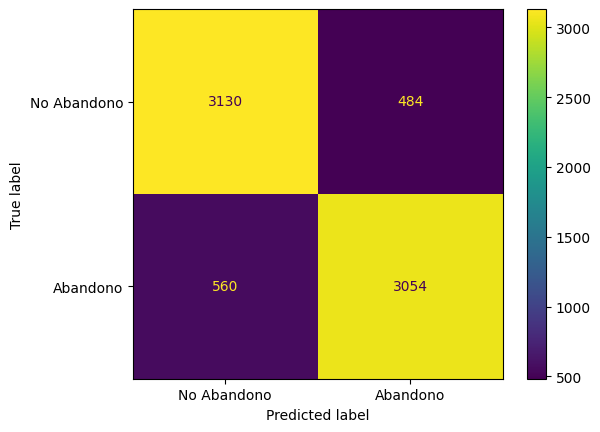

In [38]:
modelo_rf = RandomForestClassifier(random_state= 5)
y_pred_cv_rf = cross_val_predict(modelo_rf, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_random = evaluacion_modelos(y_train_balanceada,y_pred_cv_rf)


Exactitud: 0.793
Precisión: 0.732
Recall: 0.925
F1 Score: 0.817


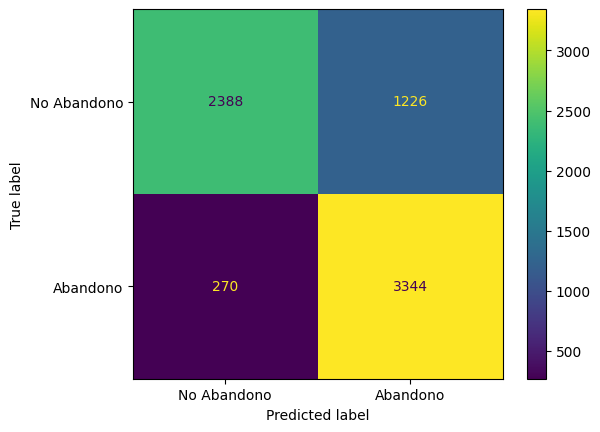

In [39]:
modelo_knn = KNeighborsClassifier()
y_pred_cv_knn = cross_val_predict(modelo_knn, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_knn = evaluacion_modelos(y_train_balanceada,y_pred_cv_knn)

In [40]:
modelo_arbol.fit(X_train_balanceada,y_train_balanceada)
y_pred_arbol = modelo_arbol.predict(X_val)

modelo_rf.fit(X_train_balanceada,y_train_balanceada)
y_pred_rf = modelo_rf.predict(X_val)

modelo_knn.fit(X_train_balanceada,y_train_balanceada)
y_pred_knn = modelo_knn.predict(X_val)

modelos = {
    'Árbol de Decisión': y_pred_arbol,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_val, pred)
    prec = precision_score(y_val, pred)
    rec = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    
    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla ordenada por F1 Score
tabla_resultados.sort_values(by='F1 Score', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
2,KNN,0.673,0.429,0.696,0.531
1,Random Forest,0.764,0.563,0.493,0.526
0,Árbol de Decisión,0.730,0.491,0.500,0.496


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Exactitud: 0.755
Precisión: 0.535
Recall: 0.607
F1 Score: 0.569


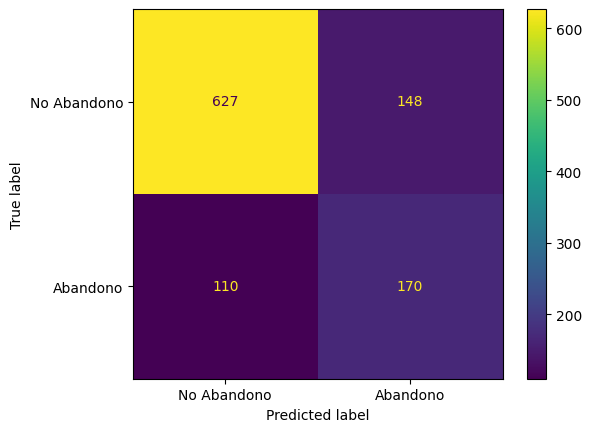

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

arbol = DecisionTreeClassifier(random_state=5)

grid_search = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanceada, y_train_balanceada)

best_tree = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred_best_tree = best_tree.predict(X_val)
resultados_best_tree = evaluacion_modelos(y_val, y_pred_best_tree)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud: 0.776
Precisión: 0.581
Recall: 0.561
F1 Score: 0.571


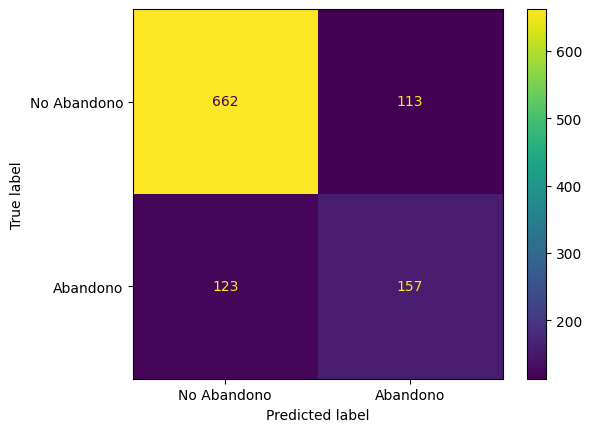

In [42]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=5),
    param_grid=param_grid_rf,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_balanceada, y_train_balanceada)

best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

y_pred_best_rf = best_rf.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Exactitud: 0.735
Precisión: 0.5
Recall: 0.579
F1 Score: 0.536


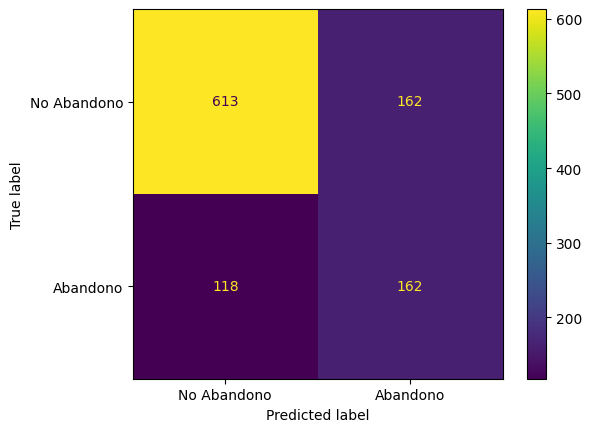

In [43]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_balanceada, y_train_balanceada)

best_knn = grid_search_knn.best_estimator_
print("Mejores hiperparámetros:", grid_search_knn.best_params_)

y_pred_best_knn = best_knn.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_knn)

In [44]:
y_pred_best_tree_test = best_tree.predict(X_test)
y_pred_best_rf_test = best_rf.predict(X_test)
y_pred_best_knn_test = best_knn.predict(X_test)

modelos = {
    'Árbol de decisiones con hiperparámetros': y_pred_best_tree,
    'Random Forest con hiperparámetros': y_pred_best_rf_test,
    'KNN con hiperparámetros': y_pred_best_knn,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla ordenada por F1 Score
tabla_resultados.sort_values(by='F1 Score', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
1,Random Forest con hiperparámetros,0.806,0.657,0.566,0.608
2,KNN con hiperparámetros,0.565,0.225,0.260,0.241
0,Árbol de decisiones con hiperparámetros,0.567,0.223,0.253,0.237


Tomando en cuenta los resultados de los modelos podemos concluir que el mejor modelo es el de ***Random Forest***, debido a que tiene la mayor exactitud, precisión, recall y F1-score, al probarlo con el conjunto de datos de prueba.

# Resultados del mejor modelo (Random Forest)

In [45]:
y_pred_best_rf_test = best_rf.predict(X_test)
print(classification_report(y_test,y_pred_best_rf_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       774
           1       0.66      0.57      0.61       281

    accuracy                           0.81      1055
   macro avg       0.75      0.73      0.74      1055
weighted avg       0.80      0.81      0.80      1055



Exactitud: 0.806
Precisión: 0.657
Recall: 0.566
F1 Score: 0.608


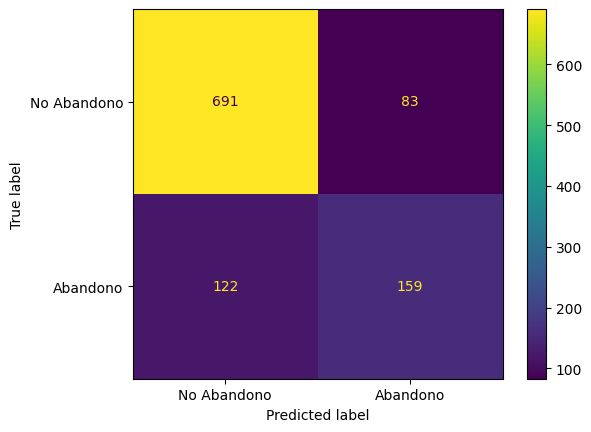

In [46]:
resultados_best_tree = evaluacion_modelos(y_test, y_pred_best_rf_test)

# Importancia de las variables

In [47]:
importancia = best_rf.feature_importances_
df_feature_importance = pd.DataFrame({'Variable': X_df.columns, 'Importancia':(importancia*100).round(2)}).sort_values('Importancia', ascending= False)
df_feature_importance

,Variable,Importancia
11,remainder__Meses_contrato,19.12
3,onehotencoder__Tipo_contrato_Dos años,8.90
5,onehotencoder__Metodo_pago_Cheque electrónico,8.14
2,onehotencoder__Tipo_servicio_internet_Fibra Op...,7.15
4,onehotencoder__Tipo_contrato_Un año,6.20
14,remainder__Seguridad_en_linea,5.17
20,remainder__Factura_en_linea,5.16
17,remainder__Soporte_tecnico,4.33
9,remainder__Pareja,3.73
10,remainder__Dependientes,3.29


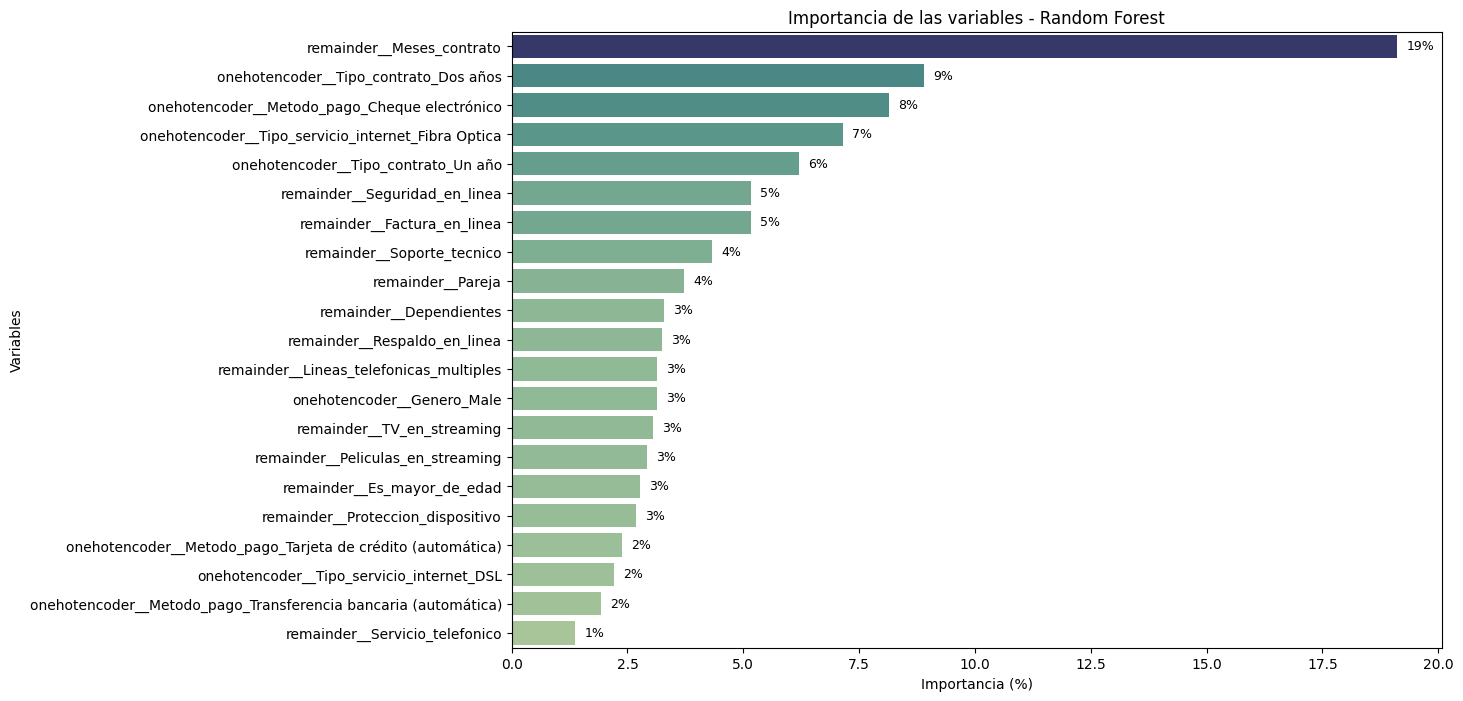

In [48]:
plt.figure(figsize=(12,8))
bars = sns.barplot(
    data=df_feature_importance,
    y='Variable',
    x='Importancia',
    hue='Importancia',
    palette='crest',
    dodge=False, legend= False
)
bars.set(xlabel='Importancia (%)', ylabel='Variables')
plt.title('Importancia de las variables - Random Forest')

for i, v in enumerate(df_feature_importance['Importancia']):
    bars.text(
        v + 0.2,  
        i,        
        f'{int(round(v))}%', 
        color='black',
        va='center',
        fontsize=9
    )

plt.show()

In [56]:
from imblearn.pipeline import Pipeline as imbpipeline

In [59]:
columnas_cat = list(X.select_dtypes(include='object').columns)



preprocesador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat)
], remainder= 'passthrough', sparse_threshold=0 )

pipeline = imbpipeline(steps=[
    ('Preprocesamiento', preprocesador),
    ('Oversample', SMOTE(random_state=5)), 
    ('Modelo_Random_Forest_con_Hiperparámetros', best_rf)
    ])

# Pipeline

Exactitud: 0.805
Precisión: 0.64
Recall: 0.609
F1 Score: 0.624


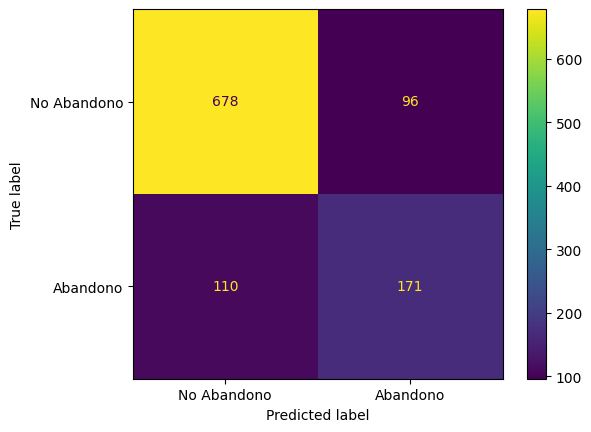

In [61]:
pipeline.fit(X.loc[X_train.index], y_train)
y_pred_pipeline = pipeline.predict(X.loc[X_test.index])
evaluacion_modelos(y_test, y_pred_pipeline)